In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2

In [19]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 10)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

In [20]:
directory="dataset/"
classses=os.listdir(directory)

In [23]:
# import os
# import cv2
# image_size=224
# data1=[]#empty list
# for category in classses:
#     path = os.path.join(directory, category)
#     print(path)
#     label = classses.index(category)
#     for img in os.listdir(path):
#         img_path = os.path.join(path, img)
#         arr = cv2.imread(img_path)#Reading Images
#         arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
#         new_arr = cv2.resize(arr, (image_size, image_size))#Resizing into same shape
#         data1.append([new_arr, label])

import os
import cv2

image_size = 224
data1 = []  # Empty list

valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')

for category in classses:
    path = os.path.join(directory, category)
    print(f"Category path: {path}")
    label = classses.index(category)

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        
        # Skip invalid or non-image files
        if not img.lower().endswith(valid_extensions):
            print(f"Skipping unsupported file: {img}")
            continue
        
        try:
            arr = cv2.imread(img_path)  # Reading Images
            if arr is None:
                print(f"Could not load image: {img_path}")
                continue

            arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
            new_arr = cv2.resize(arr, (image_size, image_size))  # Resizing
            data1.append([new_arr, label])

        except Exception as e:
            print(f"Error processing {img_path}: {e}")


Category path: dataset/BRACELET
Category path: dataset/EARRINGS
Category path: dataset/NECKLACE
Category path: dataset/RINGS
Category path: dataset/WRISTWATCH


In [24]:
import random
random.shuffle(data1)

In [25]:
len(data1)

1561

In [26]:
classses

['BRACELET', 'EARRINGS', 'NECKLACE', 'RINGS', 'WRISTWATCH']

In [27]:
x=[]#ndependent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [28]:
x=np.array(x)
y=np.array(y)
#x=x/255 #feature scaling

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(classses), activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

C:\Users\rmund\.conda\envs\project\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [31]:
progess = model.fit(x=X_train,y=y_train,epochs=5,validation_data= (X_test, y_test))

Epoch 1/5
39/39 [==============================] - 1123s 29s/step - loss: 1.2938 - accuracy: 0.6931 - val_loss: 0.3216 - val_accuracy: 0.9073
Epoch 2/5
39/39 [==============================] - 1522s 39s/step - loss: 0.2682 - accuracy: 0.9255 - val_loss: 0.3759 - val_accuracy: 0.9201
Epoch 3/5
39/39 [==============================] - 1133s 29s/step - loss: 0.2003 - accuracy: 0.9479 - val_loss: 0.1072 - val_accuracy: 0.9744
Epoch 4/5
39/39 [==============================] - 1041s 27s/step - loss: 0.0976 - accuracy: 0.9704 - val_loss: 0.1034 - val_accuracy: 0.9681
Epoch 5/5
39/39 [==============================] - 899s 23s/step - loss: 0.0471 - accuracy: 0.9832 - val_loss: 0.1295 - val_accuracy: 0.9649


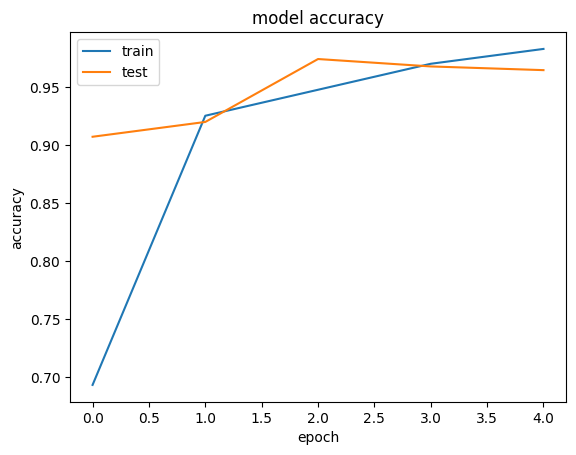

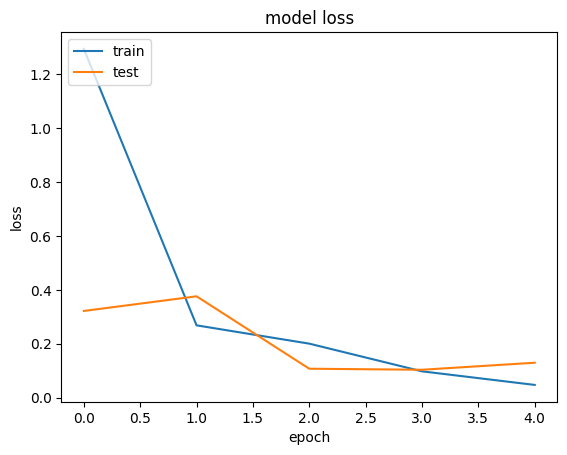

In [32]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [34]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

              precision    recall  f1-score   support

    BRACELET       0.91      0.99      0.95        76
    EARRINGS       0.99      0.96      0.97       136
    NECKLACE       0.94      0.96      0.95        48
       RINGS       1.00      0.94      0.97        35
  WRISTWATCH       1.00      1.00      1.00        18

    accuracy                           0.96       313
   macro avg       0.97      0.97      0.97       313
weighted avg       0.97      0.96      0.97       313



<Axes: >

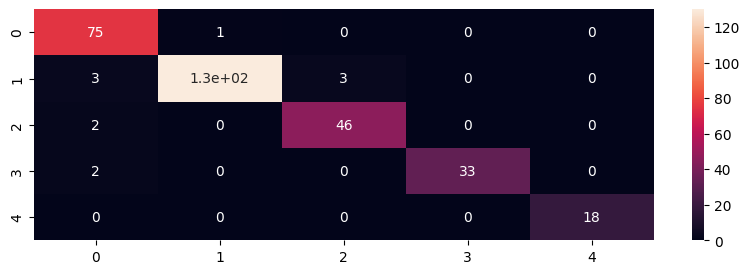

In [36]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [37]:
model.save("model/VGGSKin.hp5")

INFO:tensorflow:Assets written to: model/VGGSKin.hp5\assets


In [38]:
import os

Processing: testing/bracelet_039.jpg


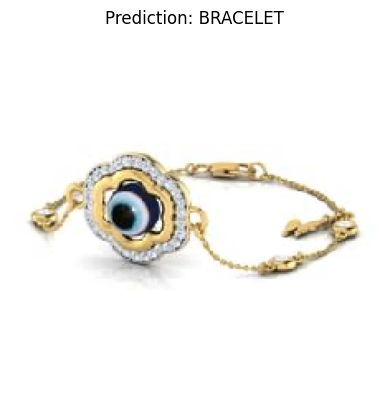

BRACELET Detected in Image
--------------------------------------------------
Processing: testing/buti-earring-250x250.jpg


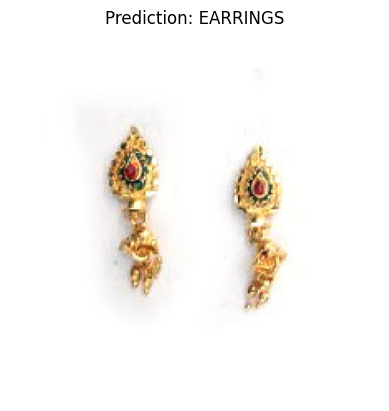

EARRINGS Detected in Image
--------------------------------------------------
Processing: testing/IMG-20181209-WA0028.jpg


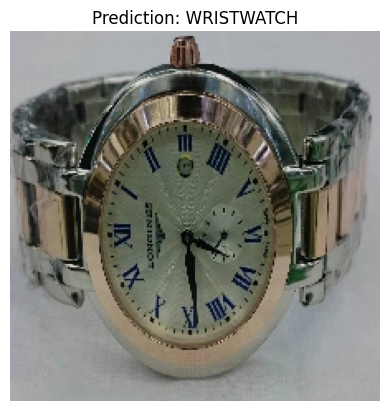

WRISTWATCH Detected in Image
--------------------------------------------------
Processing: testing/necklace_69.jpg


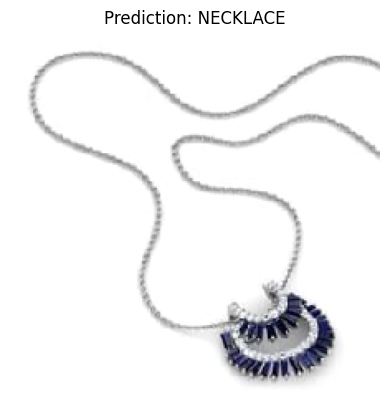

NECKLACE Detected in Image
--------------------------------------------------
Processing: testing/ring_042.jpg


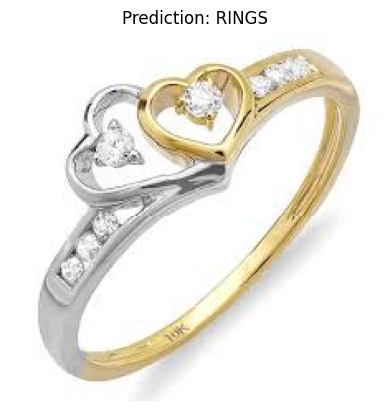

RINGS Detected in Image
--------------------------------------------------


In [42]:
# 


import os
import numpy as np
from tensorflow import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = keras.models.load_model('model/VGGSKin.hp5')

# Dictionary for predictions
dict1 = {0: 'BRACELET', 1: 'EARRINGS', 2: 'NECKLACE', 3: 'RINGS', 4: 'WRISTWATCH'}

# Directory and image size
directory = "testing/"
image_size = 224

# Loop through images in the directory
for i in os.listdir(directory):
    path = os.path.join(directory, i)
    print(f"Processing: {path}")
    
    # Load and preprocess the image
    img = image.load_img(path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    img_4d = x.reshape(1, image_size, image_size, 3)

    # Predict using the model
    predictions = model.predict(img_4d)
    new_pred = np.argmax(predictions[0])
    a = dict1[new_pred]
    
    # Display the image with matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide axes for better visualization
    plt.title(f"Prediction: {a}")
    plt.show()

    print(f"{a} Detected in Image")
    print("-" * 50)
